In [303]:
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
from mlxtend.plotting import heatmap

In [315]:
import pandas as pd

ta = pd.read_csv('data\도로교통공단_서울시 일별 시간별 지역별 교통사고 현황.csv', encoding = 'cp949')

In [316]:
ta.head()

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0


In [4]:
label = sorted(['강북구', '노원구', '동작구', '서초구', '송파구', '양천구', '용산구', '중랑구', '강남구',
       '강동구', '강서구', '동대문구', '종로구', '금천구', '영등포구', '도봉구', '광진구', '중구',
       '관악구', '구로구', '마포구', '은평구', '서대문구', '성동구', '성북구'])

In [5]:
#발생시_시군구별 pivot table 생성
ta_loc = ta.pivot_table(ta, index=['발생지_시군구'], aggfunc=np.sum)
ta_loc = ta_loc.drop('발생시간', axis = 1)
ta_loc.head()

,경상자수,부상신고자수,사고건수,사망자수,중상자수
발생지_시군구,,,,,
강남구,11102,1312,10650,53,2694
강동구,3762,551,4203,42,1392
강북구,3630,216,3695,29,1060
강서구,4857,520,4915,43,1477
관악구,3610,423,3914,29,1098


In [9]:
#가중치를 부여하여 부상자지수를 만든다
#사망자수, 중상자수, 경상자수, 부상신고자수 순

weights = np.linspace(1, 2, 4) #임의로 가중치 부여 #가중치 추후 논의 필요
values = ta_loc[['부상신고자수','경상자수','중상자수','사망자수']]
values['부상자지수'] = ta_loc['부상신고자수']*weights[0] + ta_loc['경상자수']*weights[1]+ta_loc['중상자수']*weights[2] + ta_loc['사망자수']*weights[3]

In [170]:
values=values.reindex(columns=['사망자수', '중상자수', '경상자수','부상신고자수','부상자지수'])
values.head()

,사망자수,중상자수,경상자수,부상신고자수,부상자지수
발생지_시군구,,,,,
강남구,53,2694,11102,1312,20710.666667
강동구,42,1392,3762,551,7971.000000
강북구,29,1060,3630,216,6880.666667
강서구,43,1477,4857,520,9543.666667
관악구,29,1098,3610,423,7124.333333


In [11]:
ta_loc['사고건수'].sort_values(ascending=False).head()

발생지_시군구
강남구     10650
송파구      8510
영등포구     7318
서초구      7257
마포구      5024
Name: 사고건수, dtype: int64

In [12]:
ta_loc['사망자수'].sort_values(ascending=False).head()

발생지_시군구
송파구     63
영등포구    55
동대문구    54
서초구     53
강남구     53
Name: 사망자수, dtype: int64

In [13]:
ta_loc['중상자수'].sort_values(ascending=False).head()

발생지_시군구
강남구     2694
송파구     2369
서초구     1938
영등포구    1912
동대문구    1689
Name: 중상자수, dtype: int64

In [48]:
ta_loc['부상신고자수'].sort_values(ascending=False).head()

발생지_시군구
송파구     1442
강남구     1312
영등포구    1010
서초구      911
동작구      695
Name: 부상신고자수, dtype: int64

In [14]:
ta_loc['경상자수'].sort_values(ascending=False).head()

발생지_시군구
강남구     11102
송파구      7929
서초구      7869
영등포구     7580
마포구      5381
Name: 경상자수, dtype: int64

In [ ]:
#주로 강남, 송파, 영등포, 서초

In [15]:
#한글 깨짐 방지
font_path = 'C:/windows/fonts/gulim.ttc'
fontprop = fm.FontProperties(fname=font_path, size=20).get_name()
rc('font', family=fontprop)

<AxesSubplot:xlabel='발생지_시군구'>

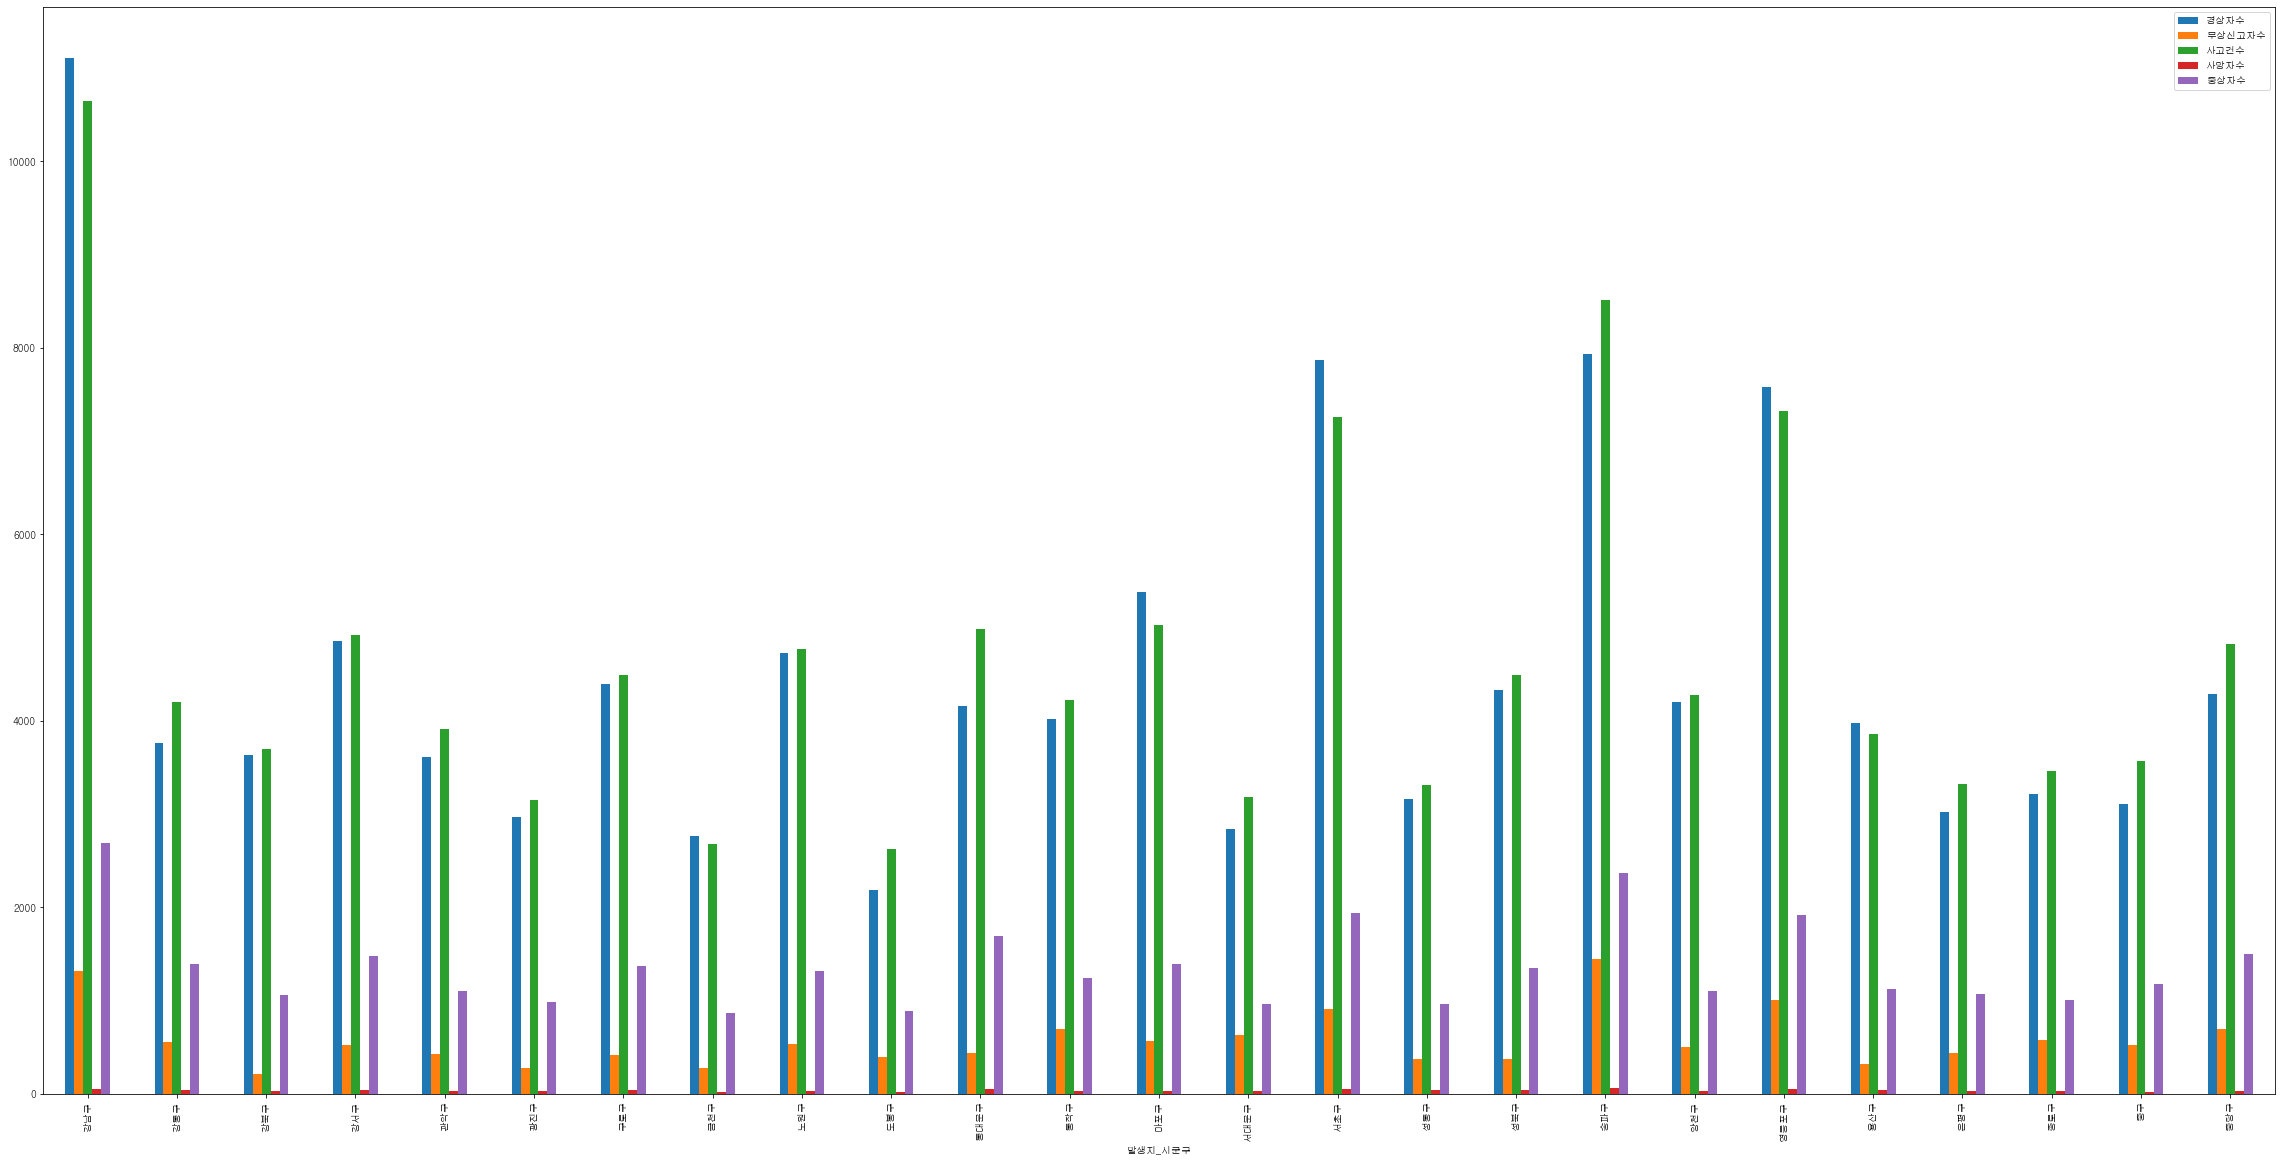

In [16]:
ta_loc.plot(kind='bar', figsize=(40,20))

In [ ]:
#사고건수와 경상자수가 대체로 비슷한걸 알 수 있다.

(0.0, 25000.0)

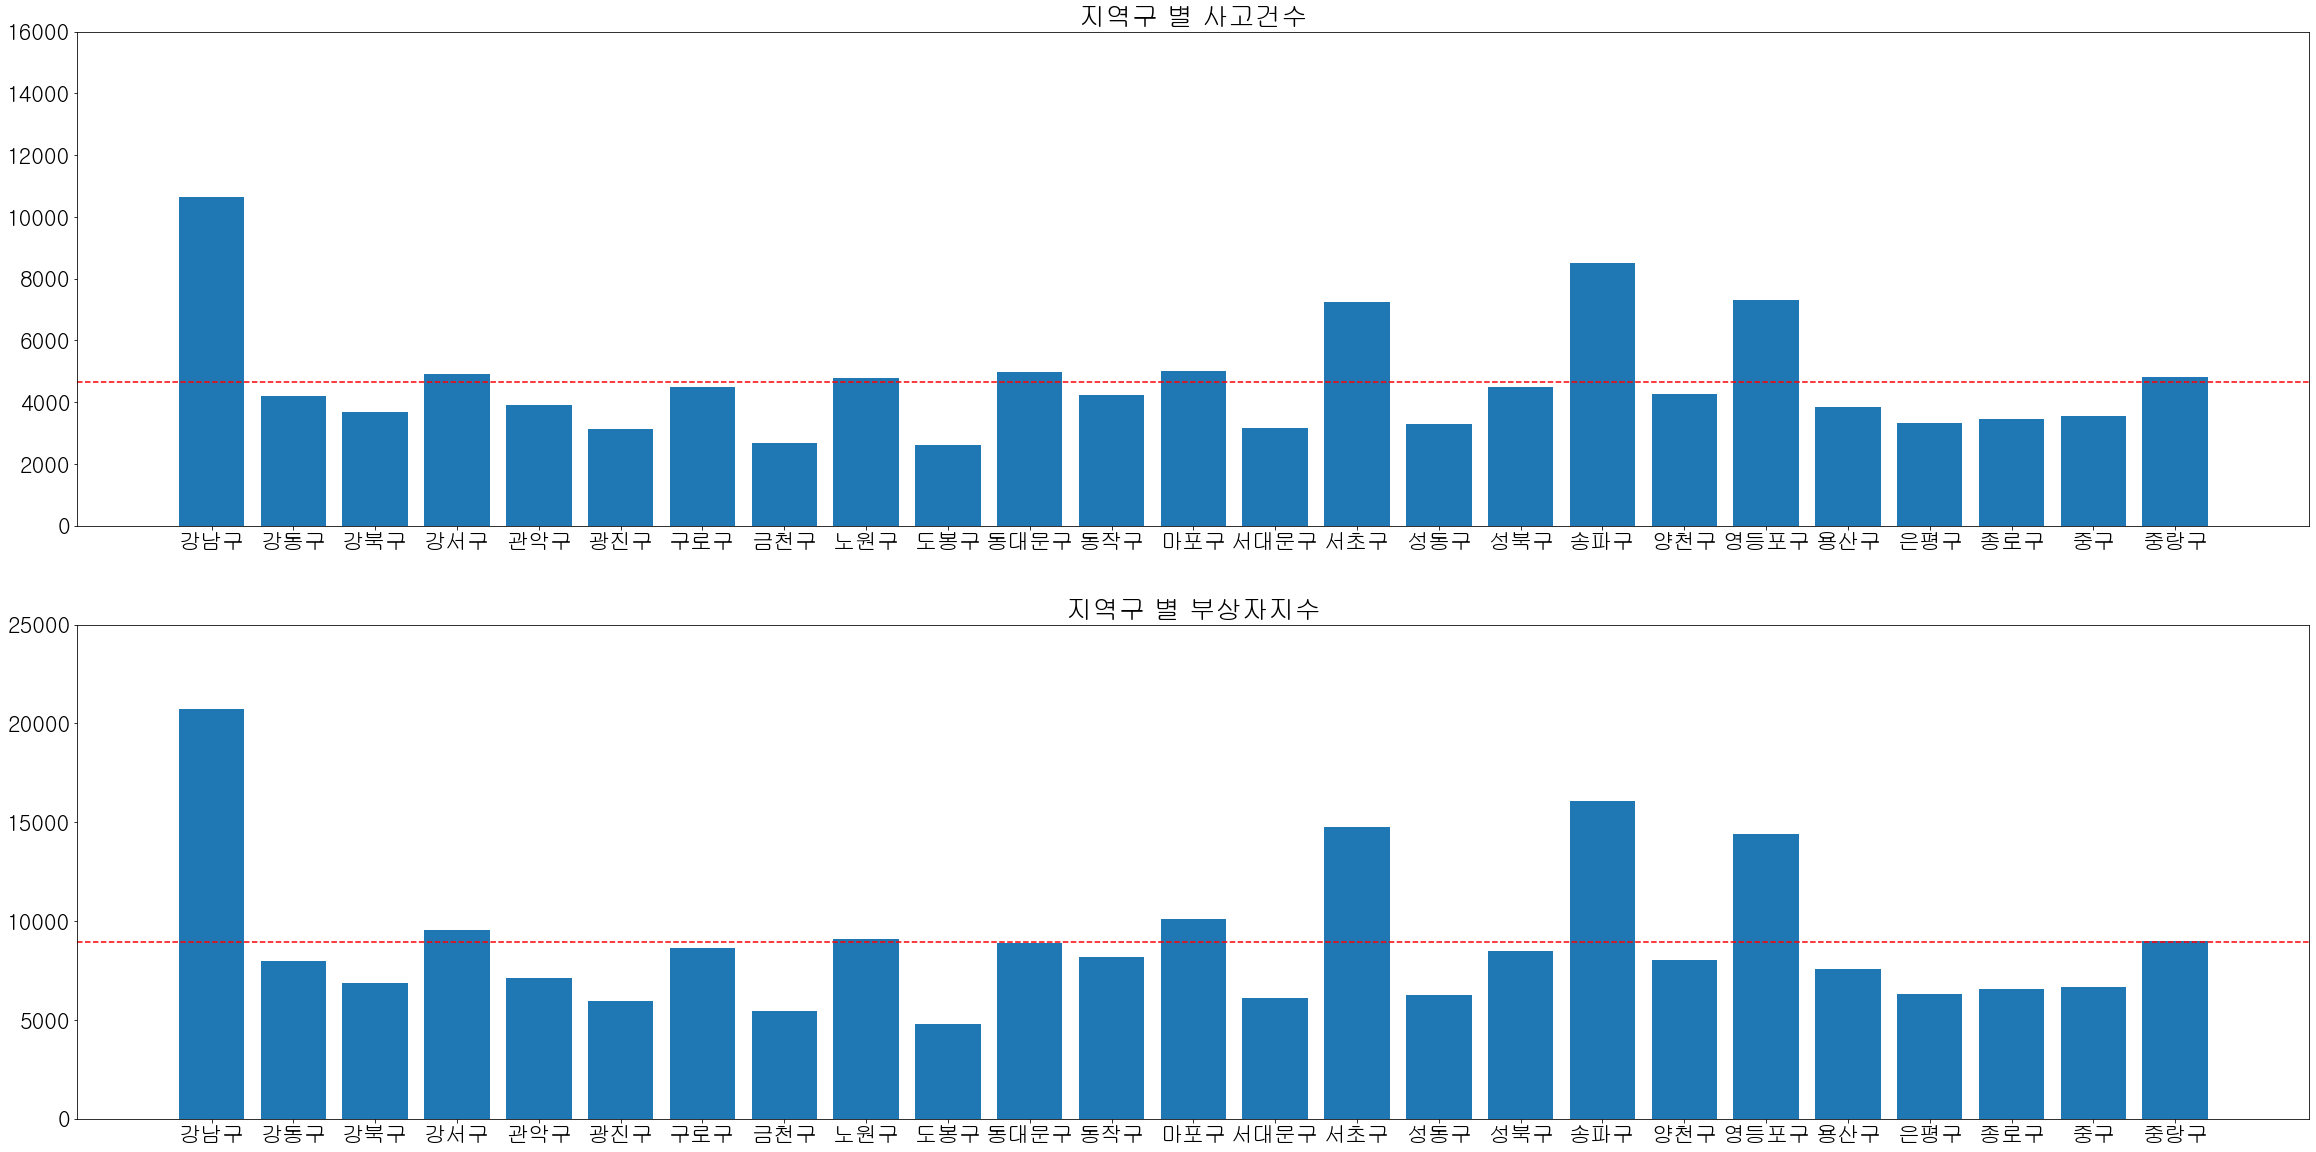

In [17]:
fig = plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 22})

ax1 = fig.add_subplot(2,1,1)
acc_avg= ta_loc['사고건수'].mean()
ax1.axhline(acc_avg, color='red',linestyle='--',label='Mean')
ax1.bar(label, ta_loc['사고건수'])
ax1.set_title('지역구 별 사고건수')
ax1.set_ylim(0,16000)

ax2 = fig.add_subplot(2,1,2)
injury_avg= values['부상자지수'].mean()
ax2.axhline(injury_avg, color='red',linestyle='--',label='Mean')
ax2.bar(label, values['부상자지수'])
ax2.set_title('지역구 별 부상자지수')
ax2.set_ylim(0,25000)

In [ ]:
#사고건수와 부상자 지수의 shape 비슷

<Figure size 1440x720 with 0 Axes>

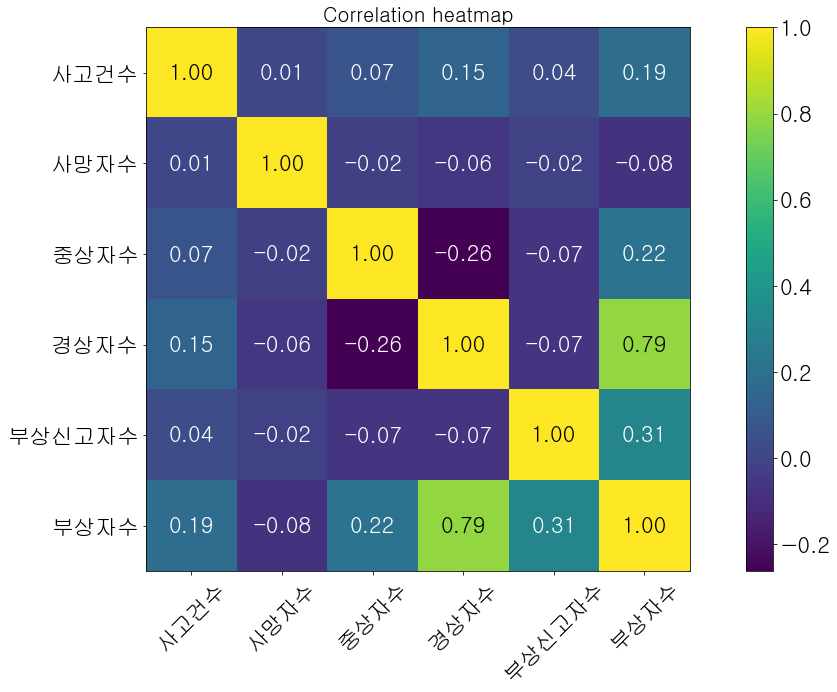

In [189]:
ta['부상자수'] = ta['중상자수'] + ta['경상자수'] + ta['부상신고자수']
ta_number = ta.select_dtypes(np.number)
ta_number = ta_number.drop('발생시간', axis=1)
cm = np.corrcoef(ta_number.values.T)
plt.figure(figsize=(20,10))
hm = heatmap(cm, 
             figsize =(20,10),
             row_names = ta_number.columns,
             column_names = ta_number.columns
            )
plt.title('Correlation heatmap', fontsize=20)
plt.show()

In [ ]:
#부상자수와 경상자수의 상관계수가 높은 걸 알 수 있음
#부상자수 대부분이 경상자수이다.

In [190]:
#시간대별 pivot table 생성
ta_time = ta.pivot_table(ta, index=['발생시간','발생지_시군구'], aggfunc=np.sum)
ta_time

경상자수  부상신고자수  부상자수  사고건수  사망자수  중상자수
발생시간 발생지_시군구                                      
0    강남구       473      54   653   428     5   126
     강동구       109      24   169   127     2    36
     강북구       158       7   206   144     4    41
     강서구       177      17   235   166     1    41
     관악구       177      22   251   169     2    52
...            ...     ...   ...   ...   ...   ...
23   용산구       183      22   254   177     1    49
     은평구       109      14   176   125     2    53
     종로구       174      33   266   186     2    59
     중구        132      28   200   148     0    40
     중랑구       156      30   248   186     2    62

[600 rows x 6 columns]

In [210]:
times = pd.DataFrame(index=range(0,24), columns=[label])
for i in range(0, 24):
    for j in range(0, 25):
        times.loc[i][j] = (ta_time.loc[i]['사고건수'][j])

In [211]:
times

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,428,127,144,166,169,131,169,105,169,81,...,128,152,266,149,259,144,123,127,116,123
1,422,98,111,128,143,127,100,73,110,51,...,93,127,243,94,215,149,93,96,98,143
2,308,95,108,101,120,97,82,60,104,51,...,79,96,193,60,178,99,76,72,77,84
3,264,57,82,73,90,57,71,42,60,39,...,53,85,125,61,118,104,55,60,59,63
4,203,64,81,97,92,52,77,48,77,34,...,60,86,132,75,128,104,40,63,58,81
5,250,94,82,132,88,58,116,69,102,39,...,76,83,150,88,162,91,63,69,79,113
6,230,94,100,136,107,77,109,57,101,55,...,81,97,196,111,168,114,105,66,64,112
7,296,161,81,167,114,98,133,94,169,77,...,100,122,278,165,208,102,101,117,116,138
8,425,240,161,267,183,157,218,132,245,127,...,162,255,439,254,383,159,158,145,160,267
9,486,189,176,215,154,132,195,96,215,107,...,182,222,408,209,330,171,153,159,152,207


<AxesSubplot:>

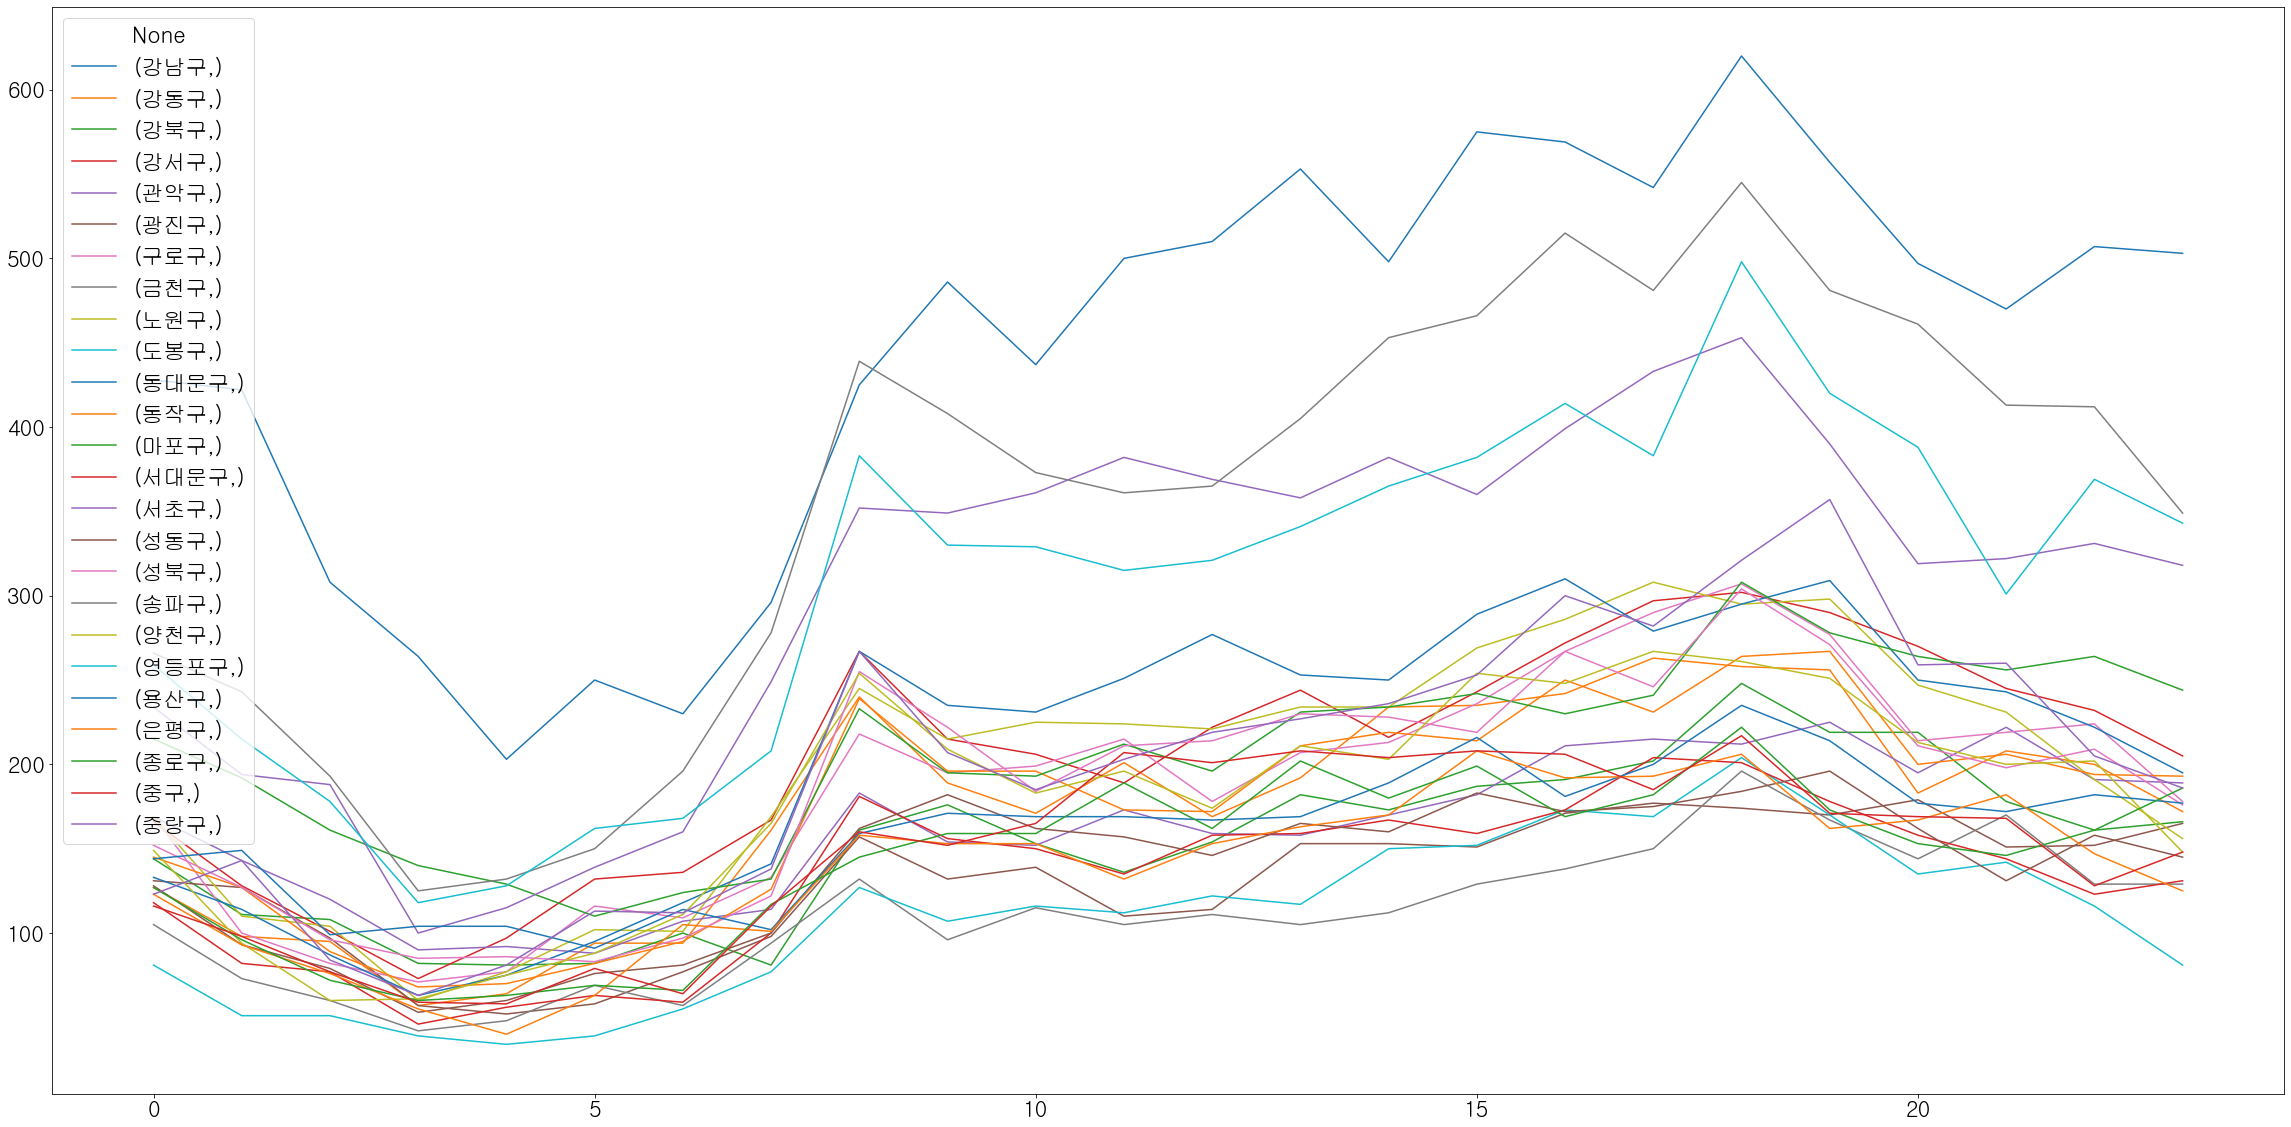

In [168]:
#시간대별 지역별 사고건수 시각화
times.plot(figsize=(40,20))

In [198]:
# pip install googlemaps
# pip install folium
import googlemaps
import folium
from folium.plugins import HeatMap
import requests
import json

In [317]:
SeoulMap = folium.Map(location=[37.5502, 126.982],zoom_start=11)
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content

with open('data\seoul_dong_geo_simple.json',encoding='utf-8') as f:
    Seoul_dong_geo = json.load(f)

Seoul_geo = json.loads(c)
# folium.GeoJson(Seoul_geo, name='지역구').add_to(SeoulMap)

In [60]:
print(Seoul_geo['features'][5]['geometry']['coordinates'])
print(Seoul_geo['features'][5]['properties']['name'])

[[[126.98223807916081, 37.509314966770326], [126.98241580381733, 37.50120029501884], [126.9832495184969, 37.49948552591205], [126.9871787157338, 37.49719505997539], [126.98500224966135, 37.49356837311327], [126.98367668291802, 37.473856492692086], [126.97901795539295, 37.47376525108475], [126.9725891850662, 37.472561363278125], [126.9634428120456, 37.48067931902171], [126.96443983219191, 37.48442261322104], [126.96291787066104, 37.48803272157808], [126.96329694970828, 37.4905835370787], [126.95881175306481, 37.48874989165474], [126.9559655046206, 37.48820165625994], [126.95396955055433, 37.48955250290043], [126.94922661389508, 37.49125437495649], [126.94373156012337, 37.48938843727846], [126.93844070234584, 37.4893532861132], [126.93669800083833, 37.49026778789087], [126.93346386636452, 37.49043826776755], [126.92981699800066, 37.49218420958284], [126.92869559665061, 37.49132126714011], [126.92639563063156, 37.48715979752876], [126.91916807529428, 37.48660606817164], [126.9153397977916

In [232]:
print(Seoul_dong_geo[0])

{'code': 1111051500, 'sido': '서울특별시', 'gu': '종로구', 'dong': '청운효자동', 'lat': 37.584009, 'lng': 126.970626}


In [294]:
#구별 사고건수 시각화
folium.Choropleth(geo_data = Seoul_geo, 
                  data = ta_loc, 
                  columns = [ta_loc.index,'사고건수'],
                  key_on = 'feature.properties.name', 
                  fill_color = 'Blues',
                  fill_opacity = 0.7, 
                  line_opacity = 0.3).add_to(SeoulMap)

In [291]:
SeoulMap

In [242]:
#동별 사고건수 pivot table 생성
ta_dong = ta.pivot_table(ta, index=['법정동명'], aggfunc=np.sum)
ta_dong['사고건수']

법정동명
가락동     1137
가리봉동     284
가산동      571
가양동      423
가회동        6
        ... 
후암동       90
훈정동        3
휘경동      465
흑석동      294
흥인동       64
Name: 사고건수, Length: 464, dtype: int64

In [286]:
ta_dong['사고건수'].sort_values(ascending=False).head()

법정동명
역삼동    2254
신림동    2137
서초동    2102
상계동    1983
구로동    1898
Name: 사고건수, dtype: int64

In [257]:
ta_dong['lat'] = 00.000000
ta_dong['lng'] = 00.000000

In [318]:
#각 동에 맞는 경도 위도 추가
for i in range(len(ta_dong)):
    for j in range(len(Seoul_dong_geo)):
        if ta_dong.index[i] == Seoul_dong_geo[j]['dong']:
            ta_dong['lat'][i] = Seoul_dong_geo[j]['lat']
            ta_dong['lng'][i] = Seoul_dong_geo[j]['lng']

<ipython-input-318-591a27fb6192>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta_dong['lat'][i] = Seoul_dong_geo[j]['lat']
<ipython-input-318-591a27fb6192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta_dong['lng'][i] = Seoul_dong_geo[j]['lng']


In [319]:
ta_dong

,경상자수,발생시간,부상신고자수,사고건수,사망자수,중상자수,lat,lng
법정동명,,,,,,,,
가락동,1060,13897,188,1137,11,294,37.496486,127.126006
가리봉동,282,3447,32,284,2,72,37.482944,126.888062
가산동,614,7234,53,571,3,175,37.477598,126.888291
가양동,480,5533,38,423,2,113,37.568238,126.845059
가회동,6,90,0,6,0,1,37.582235,126.984666
...,...,...,...,...,...,...,...,...
후암동,70,1197,8,90,0,32,37.549171,126.978938
훈정동,3,49,0,3,0,0,37.570980,126.995131
휘경동,407,6348,45,465,8,169,37.589592,127.061228


In [277]:
#위도경도 포함한 법정동명 csv 변환
ta_dong.to_csv('dong.csv', encoding='utf-8-sig')

In [320]:
#사고건수에 따른 heatmap
heatmap = HeatMap( list(zip(ta_dong['lat'], ta_dong['lng'], ta_dong["사고건수"])),
                   min_opacity=0.2,
                   radius=50, blur=50, 
                   max_zoom=1)

heatmap.add_to(SeoulMap)

In [321]:
SeoulMap